In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/messy_data.csv?token=GHSAT0AAAAAACA3H3L4NYBPZLIWFREGEE26ZDFOSQQ')

In [27]:
# always start with info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       105 non-null    int64  
 1   Income    94 non-null     float64
 2   Gender    105 non-null    object 
 3   Product   100 non-null    object 
 4   Quantity  105 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [28]:
df.describe(include='all')

,Age,Income,Gender,Product,Quantity
count,105.000000,94.000000,105,100,105.00000
unique,NaN,NaN,2,4,NaN
top,NaN,NaN,Female,D,NaN
freq,NaN,NaN,58,28,NaN
mean,42.076190,52867.862808,NaN,NaN,3.20000
std,15.940813,29896.579420,NaN,NaN,1.44382
min,18.000000,20901.331720,NaN,NaN,1.00000
25%,31.000000,37814.315255,NaN,NaN,2.00000
50%,41.000000,48760.369705,NaN,NaN,3.00000
75%,55.000000,61644.277868,NaN,NaN,5.00000


In [29]:
import seaborn as sns

<Axes: xlabel='Income', ylabel='Count'>

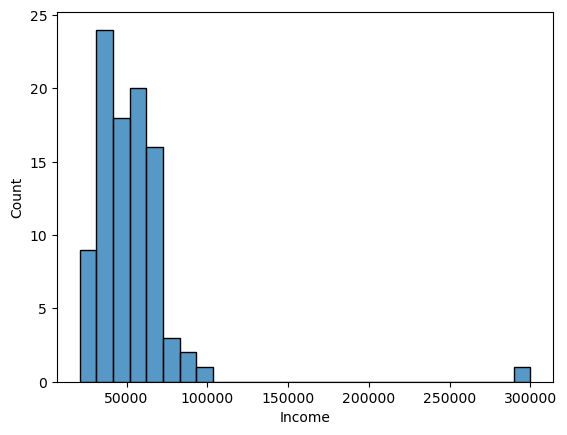

In [30]:
sns.histplot(df['Income'])

<Axes: >

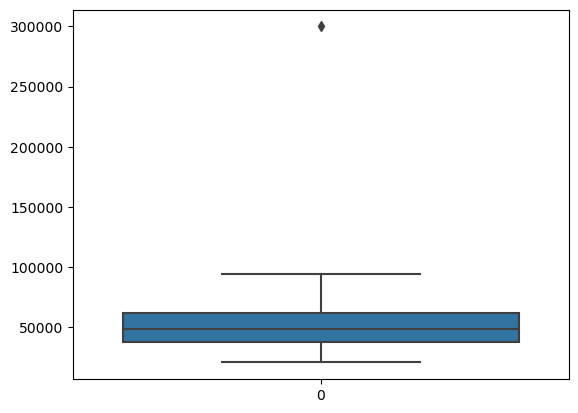

In [31]:
sns.boxplot(df['Income'])

In [32]:
# write a statement to filter the data set and identify the outlier
df[df['Income'] == 300000]


,Age,Income,Gender,Product,Quantity
99,61,300000.0,Male,B,4


In [33]:
# drop the outlier
df.drop(99, axis=0, inplace=True )

<Axes: >

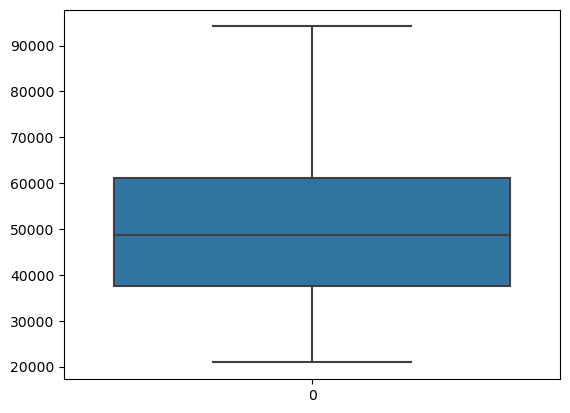

In [34]:
sns.boxplot(df['Income'])

<Axes: xlabel='Income', ylabel='Count'>

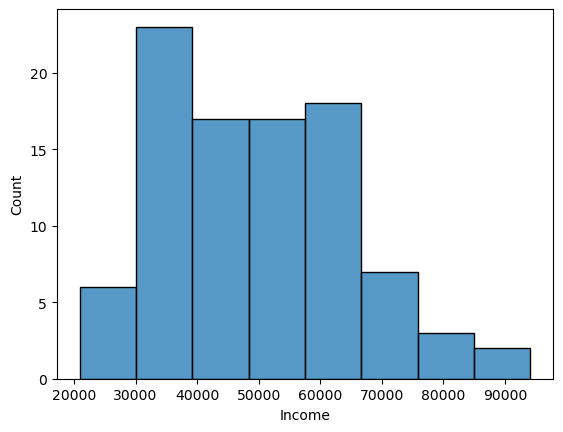

In [35]:
sns.histplot(df['Income'])

<Axes: xlabel='Gender', ylabel='Income'>

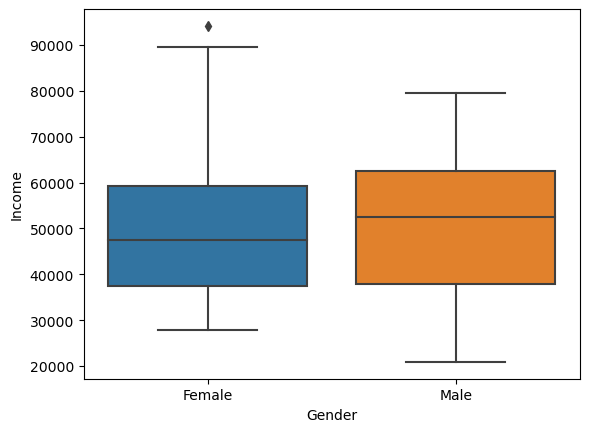

In [36]:
sns.boxplot(data = df, x = 'Gender', y = 'Income' )

<Axes: xlabel='Age', ylabel='Income'>

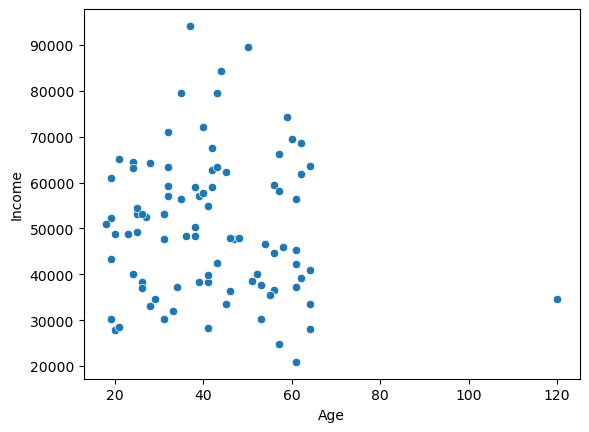

In [37]:
sns.scatterplot(data = df, x = 'Age', y = 'Income')

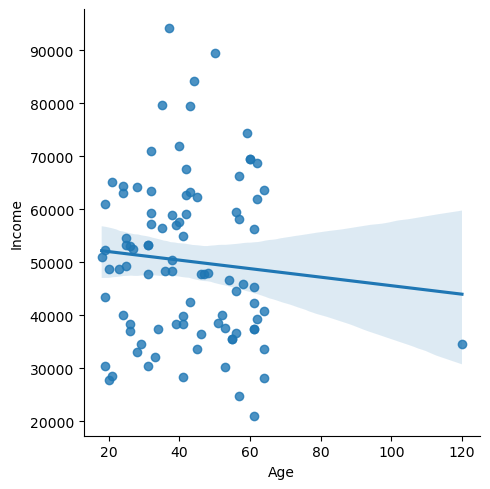

In [38]:
sns.lmplot(data = df, x = 'Age', y = 'Income', fit_reg=True)

In [39]:
df.drop(df[df['Age']==120].index, axis=0, inplace=True)

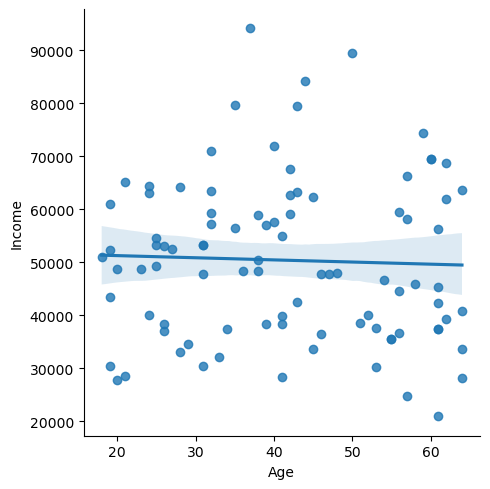

In [40]:
sns.lmplot(data = df, x = 'Age', y = 'Income', fit_reg=True)

In [41]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       98 non-null     int64  
 1   Income    88 non-null     float64
 2   Gender    98 non-null     object 
 3   Product   93 non-null     object 
 4   Quantity  98 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ KB


In [43]:
df['Product'] = df['Product'].fillna("Other")

In [44]:
df.groupby('Product')['Income'].mean()

Product
A        52599.570360
B        48693.364717
C        50742.171429
D        50377.772819
Other    47685.057048
Name: Income, dtype: float64

In [45]:
df['Income'] = df['Income'].fillna(df['Income'].mean())